# Comment animer un graphique sous Python ?
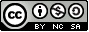code sous licence creative commun CC BY-NC-SA BY Gaëlle Rebolini

Une animation est une succession d'images s'affichant à intervalle de temps régulier.
Le principe de ce programme est d'afficher les courbes les unes après les autres afin de créer une courbe animée.

Pour réaliser une courbe animée, il faut utiliser la méthode :

**animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=30, blit=True,repeat=False)**

Les paramètres sont les suivants :
- fig : nom de l'objet **plt.figure()**
- animate : nom de la fonction permettant de tracer chaque image sucessivement à l'aide du paramètre i.
- init_func : paramètre appelant la fonction init permettant de tracer le fond de chaque image à partir de l'objet fig
- frames : nombre d'images constituant l'animation (ici 100 images)
- interval : intervalle de temps séparant deux images successives en milliseconde (ici 30 ms)
- blit : seuls les éléments de l'image modifiés seront redessinées à chaque image si blit est égal à True
- repeat : l'animation ne s'exécutera qu'une fois, ne se repètera pas si repeat est égal à False.

Il faut donc créer le graphique et les deux fonctions init et animate avant d'utiliser la méthode **animation.FuncAnimation()**

Pour afficher l'animation dans un éditeur Python, la méthode **plt.show()** suffit.

Pour l'afficher dans ce notebook, on est obligé de passer par un widget Javascript interactif 
(représentation HTML par défaut des objets Animation) en utilisant les lignes de code 
- **rc('animation', html='jshtml')**
- **anim** (nom de l'animation dans le programme suivant)


Afin d'illustrer ce tutoriel, nous prendrons l'exemple de l'animation d'une onde progressive sinusoïdale.

Voici le programme complet expliqué point par point :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

Ymax=2   # amplitude en m
T=3      # période en s
l=2      # longueur d'onde en m

xmin=0    # valeur minimale de x
xmax=3*l  # valeur maximale de x afin d'afficher 3 longueurs d'onde à l'écran
nbx=100   # nombre de points sur le graphique
            
# création du graphique (cf. tutoriels sur les graphiques)

fig = plt.figure(figsize=(12,10))   
plt.xlim(xmin,xmax)
plt.ylim(-Ymax,Ymax)
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("animation : propagation d'une onde progressive sinusoïdale")

# création de la courbe que nous voulons animer. Les listes contenant les valeurs de l'abscisse et de l'ordonnée sont vides.

line = plt.plot([], [],'bo-')   # équivalent à line = plt.plot([], [], color ='b', marker='o', style line = '-')

# création de la fonction init : permet de tracer le fond de chaque image à partir de la courbe définie ci-dessus
def init():
    line[0].set_data([], [])    # la méthode set_data permet de modifier les valeurs de l'élément d'indice 0 de l'objet line
    return (line)

# création de la fonction animate : permet de tracer la courbe sur chaque image. 
def animate(i):      # i = temps donné par l'horloge du processeur/paramètre interval
    dt=0.03         # période d'échantillonnage en seconde 
    t=i*dt
    x = np.linspace(xmin,xmax,nbx)             # création de la liste contenant les valeurs de x
    y = Ymax*np.cos(2 * np.pi * (x/l - t/T))   # écriture de la fonction définissant y en fonction de x et de t. 
    line[0].set_data(x, y)                     # la méthode set_data permet de remplacer les valeurs de l'élément d'indice 0 de l'objet line par les valeurs de x et y
    return (line)

# appel de la méthode animation.FuncAnimation()qui permettra d'afficher successivement les images à intervalle de temps régulier
# le paramètre interval en ms doit être égal à la période d'échantillonnage dt en seconde pour que le temps t dans l'animation corresponde au temps "réel"
anim=animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=30, blit=True,repeat=False)

plt.close()            # ferme les fenêtres une fois affichées afin de gagner de la mémoire

# Lignes de commandes permettant de créer un widget Javascript interactif 
# (représentation HTML par défaut des objets Animation)
# à remplacer par la méthode plt.show() dans un éditeur python du type spyder
# attention au paramétrage dans spyder : menu outils> préférences> console IPython>Graphiques> sortie graphique : automatique>OK
# puis redémarrer spyder.  L'animation s'affichera dans une nouvelle fenêtre au lieu de donner un graphique vierge dans le terminal)

rc('animation', html='jshtml')
anim

# patience, l'exécution prend du temps.